In [7]:
# Nepieciešamās bibliotēkas un bibliotēku moduļi:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Moduļi datu normēšanai
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler




# Parauga datu kopas:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.datasets import make_blobs

## Praktisks vairākās regresijas piemērs  

### Dati  
Šis ir no ss.com paņemts datasets, kurā atlikta pieejamā informācija par vasarnīcām saulkrastu rajonā, kuras tiek pārdotas, to cenām, zemes platību, uz zemes uzcelto māju platību, māju istabu skaitu un māju stāvu skaitu. Īpašumi, kuri pēc zemes platības nekvalificējas kā vasarnīcas ir atmesti.

In [207]:
zeme = pd.read_csv("cenas_ss.csv")

In [209]:
zeme.dtypes

iela         object
m2            int64
stāvi         int64
ist           int64
zempl         int64
cena_tk       int64
cena_smt      int64
??          float64
dtype: object

In [210]:
zeme['cena'] = zeme['cena_tk'] * 1000 + zeme['cena_smt']
zeme = zeme.drop(columns=['cena_tk','cena_smt','??'])

In [214]:
# zeme.sort_values('cena')

,iela,m2,stāvi,ist,zempl,cena
34,Samteiņu 1,50,1,3,850,12000
3,Ābelīte 158,114,2,4,700,14700
10,Ābelite 61,62,2,4,692,15000
23,Viršu 7,51,1,3,554,22000
31,Saulīte 196,52,1,3,1420,22500
15,Gobu 18,66,2,3,548,24000
1,Madaru 2,150,2,5,1468,25000
50,D/s Banga 39,64,1,3,448,27000
26,Saulainā ieleja 72,50,1,2,735,27000
20,Vēsma 83,120,2,4,600,27000


In [254]:
X = zeme.drop(columns = ['iela','cena']).to_numpy()
y = pd.DataFrame(zeme['cena']).to_numpy()

### Datu pētīšana  
Pirms mēs mēģinam uz datiem piedzīt lineāru modeli, dati būtu jāizpēta, lai iegūt pilnīgaku skatījumu par to, ko mēs varētu sagaidīt no modeļa.  

Pirmkārt, būtu jāizpēta kā atsevišķas kolonnas korelē ar īpašuma cenu un kā atsevišķas kolonnas korelē savā starpā  

Kolonnas(īpašības / features), kuras labi korelē ar īpašuma cenu būtu jāsaglabā un no kolonnu kopām, kuras korelē savā starpā būtu jātiek vaļā, atstājot no kopas tikai vienu.

Text(0.5, 0, 'Platību skaitliskās vērtības kvadrātmetros')

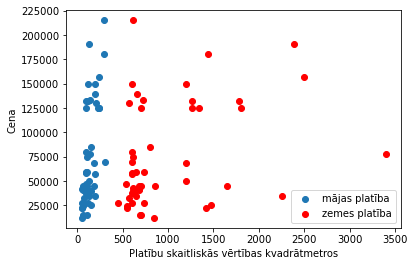

In [255]:
plt.scatter(X[:,0],y,label='mājas platība')
plt.scatter(X[:,3],y, color='red',label='zemes platība')
plt.legend()
plt.ylabel('Cena')
plt.xlabel('Platību skaitliskās vērtības kvadrātmetros')

Text(0, 0.5, 'Cena')

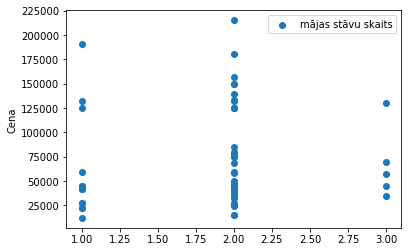

In [256]:
plt.scatter(X[:,1],y,label='mājas stāvu skaits')
plt.legend()
plt.ylabel('Cena')

Text(0, 0.5, 'Cena')

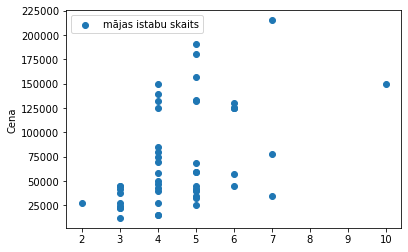

In [257]:
plt.scatter(X[:,2],y,label='mājas istabu skaits')
plt.legend()
plt.ylabel('Cena')

In [258]:
print(X.shape, y.shape)

(51, 4) (51, 1)


Pirms mēs ķeramies pie modeļa, būtu jāpārbauda arī vai kolonnas spēcīgi nekorelē savā starpā

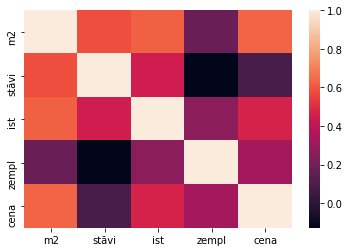

In [273]:
# zeme.drop(columns=['iela']).corr()
import seaborn as sns
sns.heatmap(zeme.drop(columns=['iela']).corr())

In [259]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [260]:
reg = LinearRegression().fit(X,y)

In [261]:
mans_ipasums = np.array([[60,1,2,780]])
reg.predict(mans_ipasums)

array([[44460.57082431]])

Tagad uzkonstruēsim taisni, kur uz X ass ir attiecīgās kolonnas un uz Y ass ir brīvais loceklis + piedzītais slīpuma koeficients reiz X 

Text(0.5, 0, 'Platību skaitliskās vērtības kvadrātmetros')

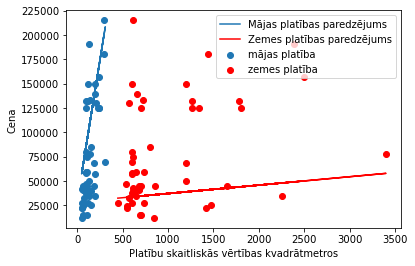

In [264]:
plt.scatter(X[:,0],y,label='mājas platība')
plt.scatter(X[:,3],y, color='red',label='zemes platība')

y_majasplat = reg.intercept_ + reg.coef_[0][0] * X[:,0]
y_zemesplat = reg.intercept_ + reg.coef_[0][3] * X[:,3]
plt.plot(X[:,0], y_majasplat,label='Mājas platības paredzējums')
plt.plot(X[:,3],y_zemesplat,label='Zemes platības paredzējums',color='red')
plt.legend()
plt.ylabel('Cena')
plt.xlabel('Platību skaitliskās vērtības kvadrātmetros')

In [265]:
reg.coef_[0][2]

5737.997582197549

Text(0, 0.5, 'Cena')

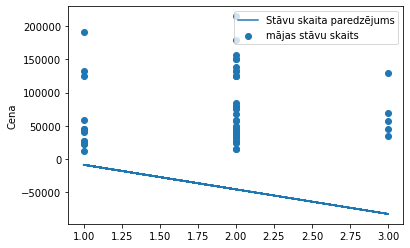

In [266]:
plt.scatter(X[:,1],y,label='mājas stāvu skaits')
y_stavi = reg.intercept_ + reg.coef_[0][1] * X[:,1]
plt.plot(X[:,1],y_stavi,label='Stāvu skaita paredzējums')
plt.legend()
plt.ylabel('Cena')

In [274]:
# Uzdevums:
# Pārbaudiet kā modelis atbilst datiem priekš mājas istabu skaita

In [293]:
# Uzdevums:
# Atkārtojiet 4 pazīmju (features) piedzīšanu, izmantojot ridge un lasso regresijas. Ko var secināt?
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# reg = Ridge(fit_intercept=False).fit(X,y)
# reg = Lasso(fit_intercept=False).fit(X,y)

In [281]:
divdim_modelis = zeme.drop(columns=['stāvi','ist','iela']).sort_values('cena')

In [282]:
X = divdim_modelis[['m2','zempl']].to_numpy()
y = divdim_modelis['cena'].to_numpy()

In [283]:
reg = LinearRegression().fit(X,y)
# reg = Ridge().fit(X,y)
# reg = Lasso().fit(X,y)

In [284]:
Y_pred = reg.predict(X)  # make predictions
mans_ipasums_2d = np.array([[60,780]])
reg.predict(mans_ipasums_2d)

array([35735.38850655])

In [290]:
reg.coef_[0]

452.98094443092356

Text(0.5, 0, 'Platību skaitliskās vērtības kvadrātmetros')

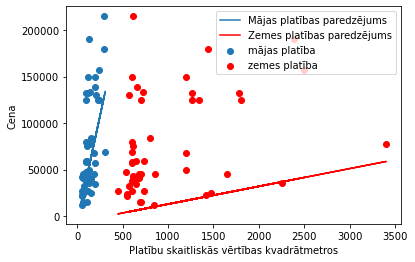

In [291]:
plt.scatter(X[:,0],y,label='mājas platība')
plt.scatter(X[:,1],y, color='red',label='zemes platība')

y_majasplat = reg.intercept_ + reg.coef_[0] * X[:,0]
y_zemesplat = reg.intercept_ + reg.coef_[1] * X[:,1]
plt.plot(X[:,0], y_majasplat,label='Mājas platības paredzējums')
plt.plot(X[:,1],y_zemesplat,label='Zemes platības paredzējums',color='red')
plt.legend()
plt.ylabel('Cena')
plt.xlabel('Platību skaitliskās vērtības kvadrātmetros')